<a href="https://colab.research.google.com/github/aysharega/Data_Science_Projects/blob/main/Kmeans_Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1. Build a unsupervised algorithm to cluster customer data (recommended: https: /scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) . Write a short text of what is the key business takeaway of the recommendation.
	Points: 4

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/marketing_campaign (1).csv', delimiter='\t')
data


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [ ]:
y= data[['MntWines','MntFruits', 'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]
from sklearn.cluster import KMeans
ML = KMeans(n_clusters=5, max_iter=4, random_state = 42)
ML = ML.fit(y)

# centers & Labels
centers = ML.cluster_centers_
labels = ML.labels_
print (centers)
print (labels)

ML= kmeans.fit_predict(x)
print(ML)
plt.scatter(x[ML ==0, 0], x[ML == 0, 1], s = 100, c = 'red', label='1')
plt.scatter(x[ML ==1, 0], x[ML == 1, 1], s = 100, c = 'blue', label='2')
plt.scatter(x[ML ==2, 0], x[ML == 2, 1], s = 100, c = 'green', label='3')
plt.scatter(x[ML ==3, 0], x[ML == 3, 1], s = 100, c = 'cyan', label='4')
plt.scatter(x[ML ==4, 0], x[ML == 4, 1], s = 100, c = 'gray', label='5')

plt.title('Cluster of Customer data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


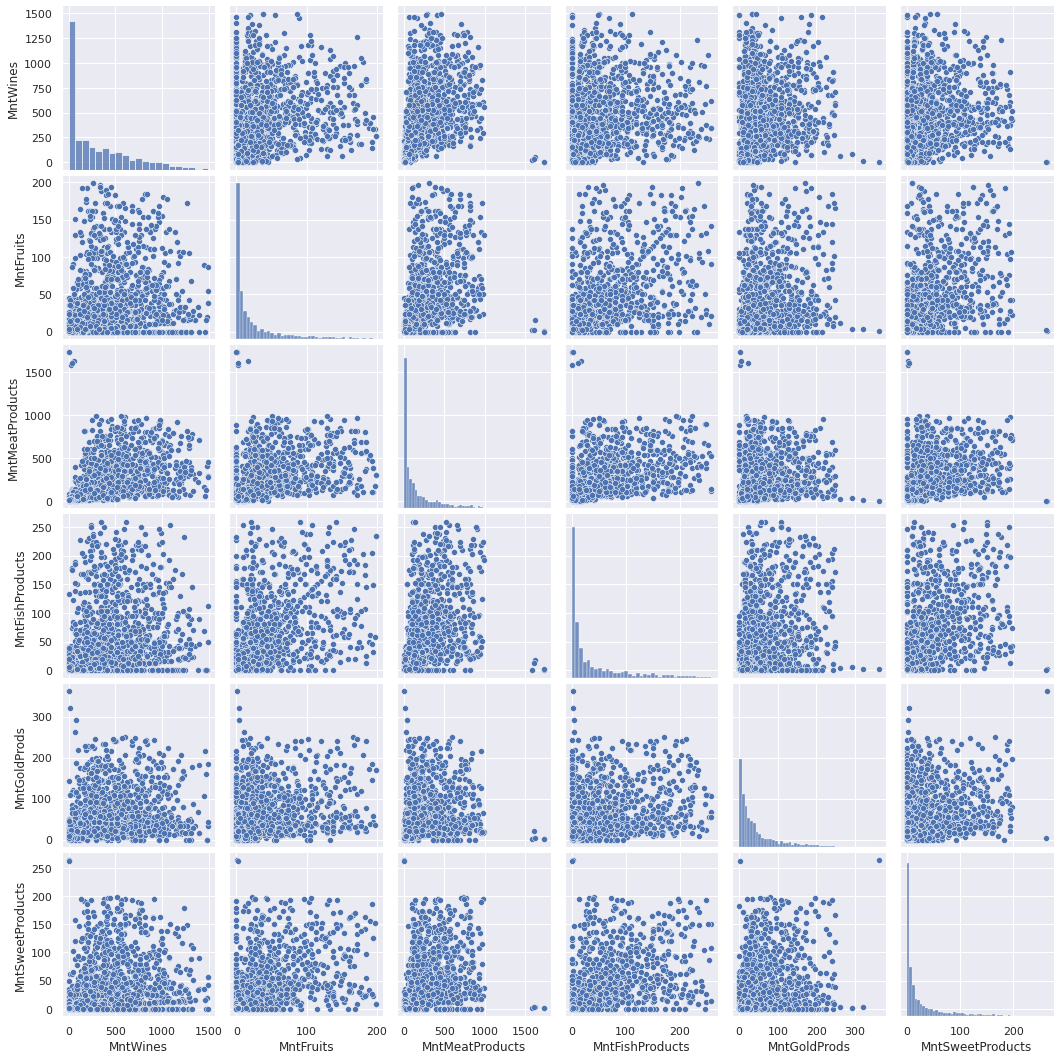

In [ ]:
#Plotting the Correlation
sns.pairplot(data[['MntWines','MntFruits', 'MntMeatProducts','MntFishProducts','MntGoldProds','MntSweetProducts']])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#since data of income column is missing
data = data[data['Income'].notnull()]
data.reset_index(drop=True, inplace=True)
# calculating the age of customers 
data['c_year'] = 2021
data['age'] = data['c_year']-data['Year_Birth']

# calculating the no of days as customers
data['c_date'] = '01-01-2015'
data['Dt_Customer'] =pd.to_datetime(data.Dt_Customer)
data['c_date'] = pd.to_datetime(data.c_date)
data['days_customer'] = (data['c_date']-data['Dt_Customer']).dt.days


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
# defining martial status as ( 0- single adult, 1- two adults)
mapping = {'Single' : 0, 'Together': 1, 'Married': 1, 'Divorced': 0, 'Widow': 0, 'Alone': 0,
       'Absurd': 0, 'YOLO': 0, 'Graduation': 1, 'PhD': 2, 'Master': 2, 'Basic': 0, '2n Cycle': 2}
data=data.replace({'Marital_Status': mapping, 'Education': mapping}) 

data['kid_teen'] = data['Kidhome'] + data['Teenhome']
data['kid_teen']= np.where(data['kid_teen'] > 0, 1, 0)

In [ ]:
data=data[['Education', 'Marital_Status', 'Income', 'kid_teen',
       'Recency','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
       'Complain', 'age', 'days_customer']]
#Applying Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(data)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x = pca.fit_transform(data)
x

array([[ 5890.6789983 ,   459.93556292],
       [-5903.19078937,  -387.98740031],
       [19365.7552842 ,   -37.10273238],
       ...,
       [ 4733.77822093,  -196.08739703],
       [16997.78035292,  -193.54776174],
       [  621.70776617,   270.03001201]])

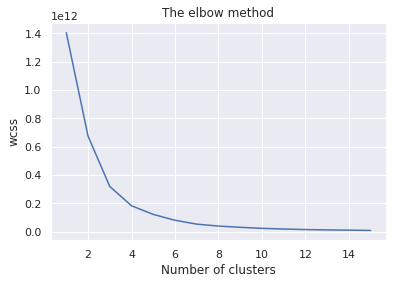

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,16), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

[[-1.03462910e+04 -7.88558573e+00]
 [ 2.95237450e+04 -1.53251280e+01]
 [-2.89469682e+04  5.80153753e+00]
 [ 6.14418710e+05  2.50708474e+02]
 [ 9.75029105e+03  1.42049422e+01]]
[4 0 4 ... 4 4 4]
[ 9 11  1 ...  9  1  0]


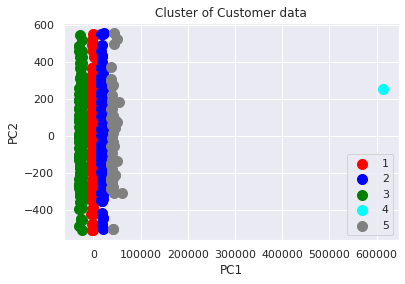

In [ ]:
from sklearn.cluster import KMeans
ML = KMeans(n_clusters=5, max_iter=4, random_state = 42)
ML = ML.fit(x)

# centers & Labels
centers = ML.cluster_centers_
labels = ML.labels_
print (centers)
print (labels)

ML= kmeans.fit_predict(x)
print(ML)
plt.scatter(x[ML ==0, 0], x[ML == 0, 1], s = 100, c = 'red', label='1')
plt.scatter(x[ML ==1, 0], x[ML == 1, 1], s = 100, c = 'blue', label='2')
plt.scatter(x[ML ==2, 0], x[ML == 2, 1], s = 100, c = 'green', label='3')
plt.scatter(x[ML ==3, 0], x[ML == 3, 1], s = 100, c = 'cyan', label='4')
plt.scatter(x[ML ==4, 0], x[ML == 4, 1], s = 100, c = 'gray', label='5')

plt.title('Cluster of Customer data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2216 samples in 0.003s...
[t-SNE] Computed neighbors for 2216 samples in 0.030s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2216
[t-SNE] Computed conditional probabilities for sample 2000 / 2216
[t-SNE] Computed conditional probabilities for sample 2216 / 2216
[t-SNE] Mean sigma: 81.152432
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.954578
[t-SNE] KL divergence after 1000 iterations: 0.258661


[Text(0.5, 1.0, 'Customer data T-SNE projection')]

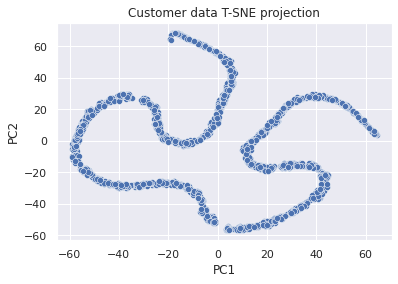

In [103]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
df = pd.DataFrame()

df["PC1"] = z[:,0]
df["PC2"] = z[:,1]

sns.scatterplot(x="PC1", y="PC2",
                palette=sns.color_palette("hls", 5),
                data=df).set(title="Customer data T-SNE projection") 

                           ID  Year_Birth  ...  Z_Revenue  Response
ID                   1.000000    0.000028  ...        NaN -0.021968
Year_Birth           0.000028    1.000000  ...        NaN  0.021325
Income               0.013095   -0.161791  ...        NaN  0.133047
Kidhome              0.002406    0.230176  ...        NaN -0.080008
Teenhome            -0.002580   -0.352111  ...        NaN -0.154446
Recency             -0.046524   -0.019871  ...        NaN -0.198437
MntWines            -0.022878   -0.157773  ...        NaN  0.247254
MntFruits            0.004600   -0.017917  ...        NaN  0.125289
MntMeatProducts     -0.004437   -0.030872  ...        NaN  0.236335
MntFishProducts     -0.024475   -0.041625  ...        NaN  0.111331
MntSweetProducts    -0.007642   -0.018133  ...        NaN  0.117372
MntGoldProds        -0.013438   -0.061818  ...        NaN  0.139850
NumDealsPurchases   -0.037166   -0.060846  ...        NaN  0.002238
NumWebPurchases     -0.018924   -0.145040  ...  

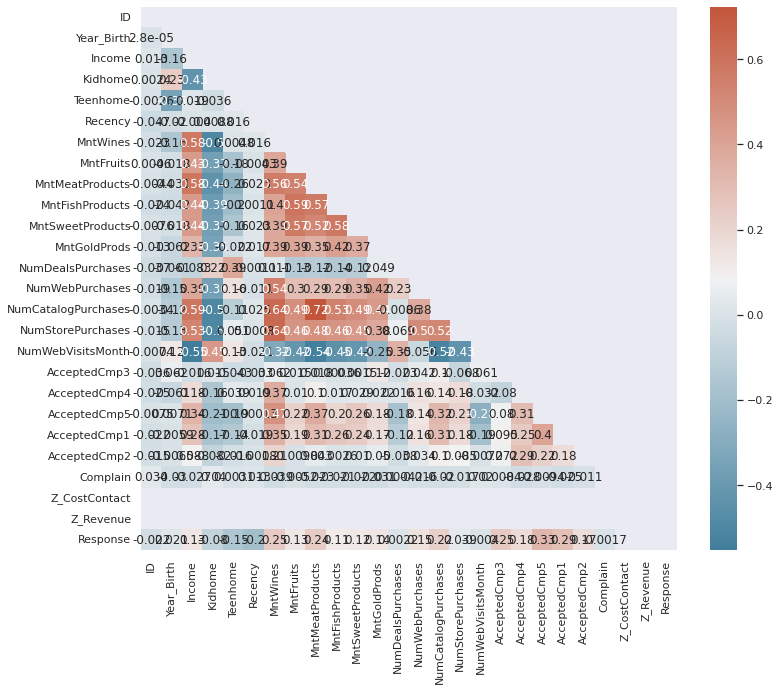

In [ ]:
# Correlation between different variables
corr = data.corr()
print(data.corr())
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)  

  


 key business takeaway of the recommendation:
Maximum purchases are done through online and catalog and most purchased product in wine and meat. 


 * Recommend to extend the focus on other products like fish, gold etc
 * Graduated people are more focused in purchasing and they are the moderate income groups.
 
